<a href="https://colab.research.google.com/github/present42/PyTorchPractice/blob/main/PRML_chapter_2_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 2.5.1
 -


In [1]:
import numpy as np

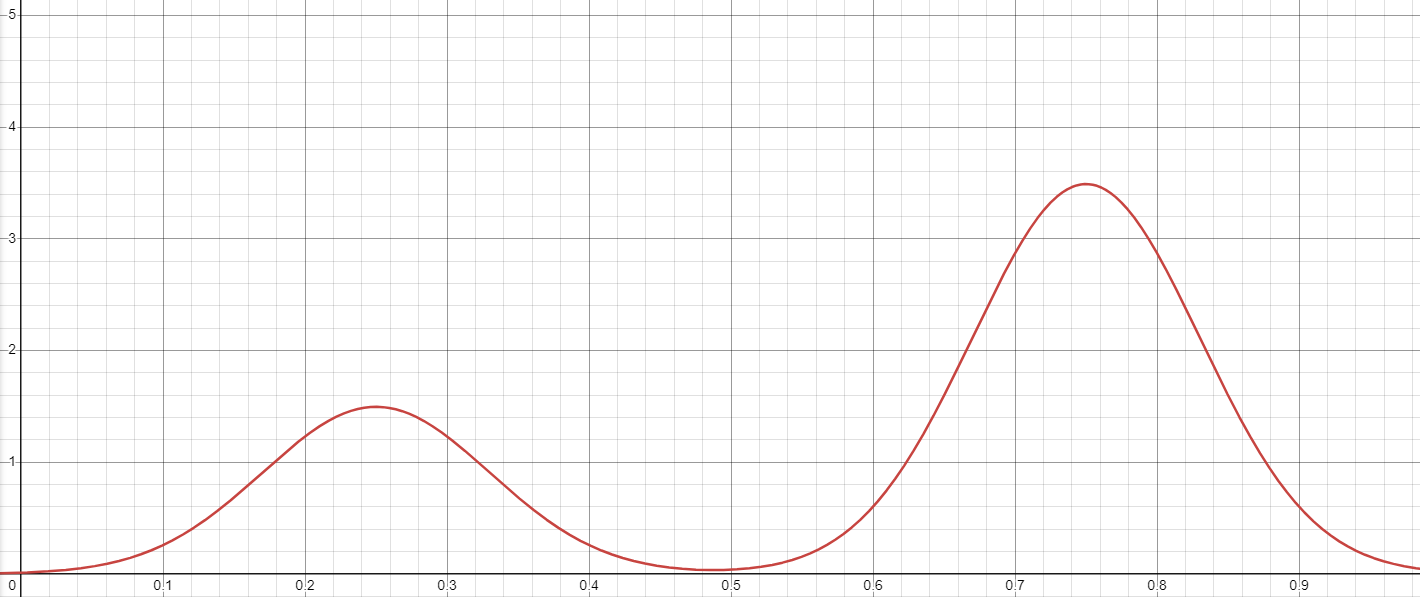

In [62]:
# Suppose data is generated from a mixture of Gaussian
n = 100
data = []
pi_1 = .25
pi_2 = .75
mu_1 = .25
mu_2 = .75
scale = 0.08

# Sampling from mixture of gaussians
x = np.random.binomial(1, pi_1, n)
for i in range(n):
  if x[i] == 1:
    # sample from N(mu_1, 1)
    sample = np.random.normal(mu_1, scale)
  else:
    # sample from N(mu_2, 1)
    sample = np.random.normal(mu_2, scale)
  data.append(sample)

In [63]:
import scipy.stats

mixture_pdf = lambda x: pi_1 * scipy.stats.norm(mu_1, scale).pdf(x) + pi_2 * scipy.stats.norm(mu_2, scale).pdf(x)

In [64]:
import matplotlib.pyplot as plt

In [65]:
data = np.array(data)

In [66]:
def gaussian_kernel(x, data, h=0.07):
  data = np.array(data)
  return np.mean(np.exp(- (x - data) ** 2 / (2 * h ** 2)) / (2 * np.pi * h ** 2) ** 0.5 )

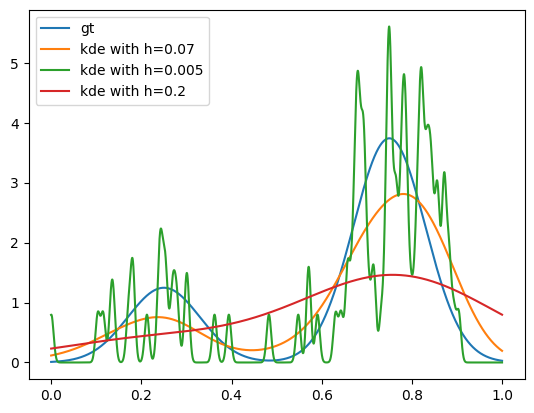

In [67]:
from functools import partial

x = np.linspace(0, 1, 10000)
y1 = list(map(partial(gaussian_kernel, data, h=0.07), x))
y2 = list(map(partial(gaussian_kernel, data, h=0.005), x))
y3 = list(map(partial(gaussian_kernel, data, h=0.2), x))


plt.plot(x, mixture_pdf(x), label="gt")
plt.plot(x, y1, label="kde with h=0.07")
plt.plot(x, y2, label="kde with h=0.005")
plt.plot(x, y3, label="kde with h=0.2")
plt.legend()